In [3]:
import requests

url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

r = requests.get(url, timeout=10)
r.raise_for_status()

with open("medical.csv", "wb") as f:
    f.write(r.content)

print("Done")


Done


In [4]:
import pandas as pd

df = pd.read_csv("medical.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(df,
    nbins=47,
    x='charges',
    color='sex',
    title="Charges according to sex",
    marginal='box',
    color_discrete_sequence=['blue','gray']
)

fig.update_layout(bargap=0.1)
fig.show()

In [13]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(df, x='smoker', color='sex', title='Smoker')

In [15]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
df.charges.corr(df.age)

np.float64(0.2990081933306476)

In [18]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362895)

In [19]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [20]:
df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [21]:
fig = px.violin(
    df,x = 'children',
    y='charges',
)
fig.show()

In [22]:
fig = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',
    hover_data='sex',
    title='BMI v/s Charges'
)

fig.update_traces(marker_size = 5)

fig.show()

In [23]:
duplicate_df = df.copy()
sex_values = {"female": 0, "male": 1}
duplicate_df['sex'] = duplicate_df['sex'].map(sex_values)
duplicate_df['smoker'] = duplicate_df['smoker'].map(smoker_values)
duplicate_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [24]:
duplicate_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [25]:
region_values = {
    "southeast": 1,
    "southwest": 2,
    "northwest": 3,
    "northeast": 4
}

duplicate_df["region"] = (
    duplicate_df["region"]
    .str.strip()
    .str.lower()
    .map(region_values)
)

duplicate_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


In [26]:
duplicate_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


## Heatmap
Often heatmap is used to visualise the correlation data

In [27]:
duplicate_df2 = df.copy()
duplicate_df2 = duplicate_df2[['age','bmi','children','charges']]
duplicate_df2

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


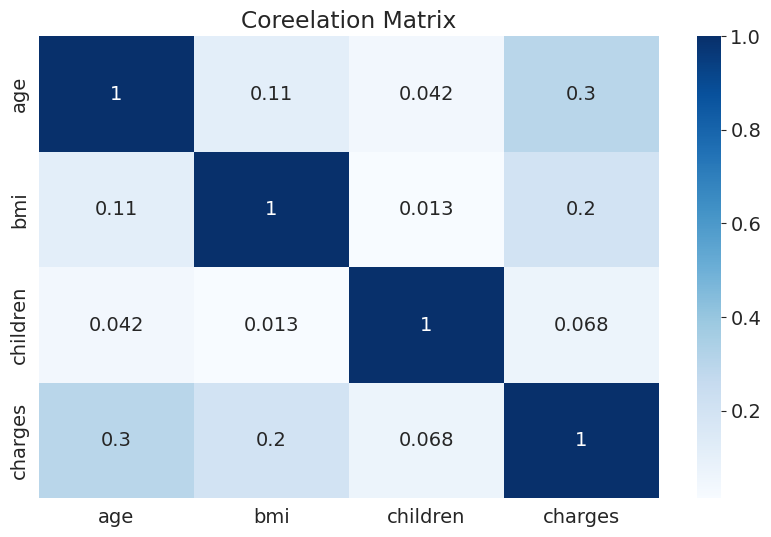

In [28]:
sns.heatmap(duplicate_df2.corr(), cmap="Blues", annot=True)
plt.title("Coreelation Matrix")
plt.show()

In [29]:
non_smoker_df = df[df.smoker=='no']

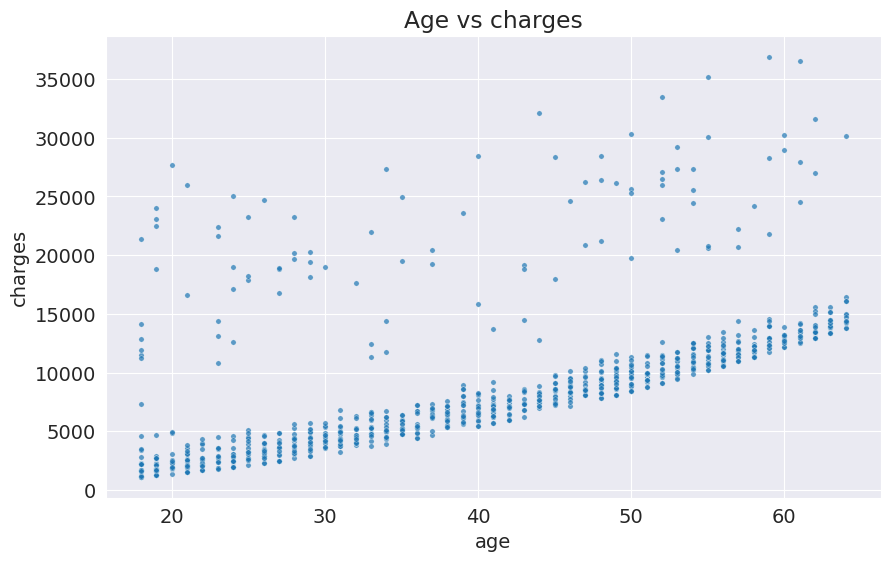

In [30]:
plt.title("Age vs charges")
sns.scatterplot(non_smoker_df,x="age", y="charges", alpha=0.7, s=15)
plt.show()

### Estimating Charges using age and Linear regression

y = wx + b

here, y = charges, x = age.

We are trying to find out the values of w(weight) and b (bias) to make the lin ethat best fits the data

In [31]:
def estimate_charges(ages,w,b):
    return (w *  ages) + b

estimate_charges(20,100,50)

2050

In [36]:
estimated_charges = estimate_charges(df.charges, 100, 50)
print(estimated_charges)

0       1688542.400
1        172605.230
2        444996.200
3       2198497.061
4        386735.520
           ...     
1333    1060104.830
1334     220648.080
1335     163033.350
1336     200844.500
1337    2914186.030
Name: charges, Length: 1338, dtype: float64


In [42]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, 100, 50)
estimated_charges

1       1850
2       2850
3       3350
4       3250
5       3150
        ... 
1332    5250
1333    5050
1334    1850
1335    1850
1336    2150
Name: age, Length: 1064, dtype: int64

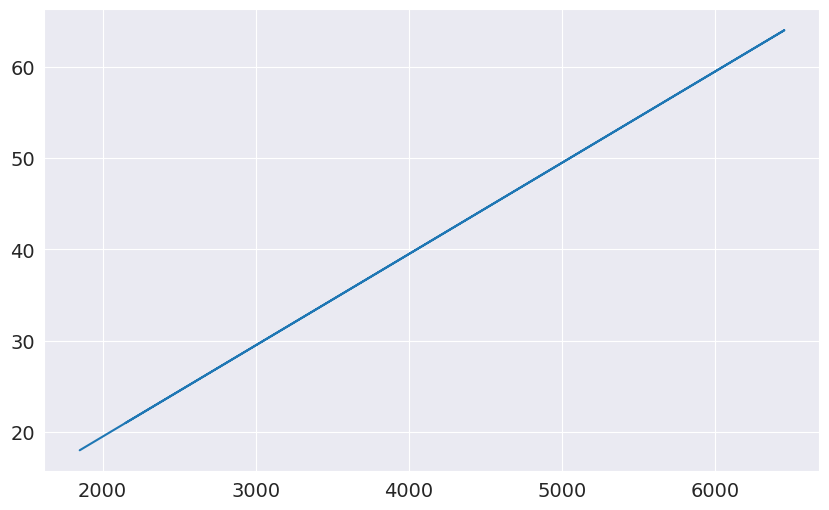

In [43]:
plt.plot(estimated_charges,ages)

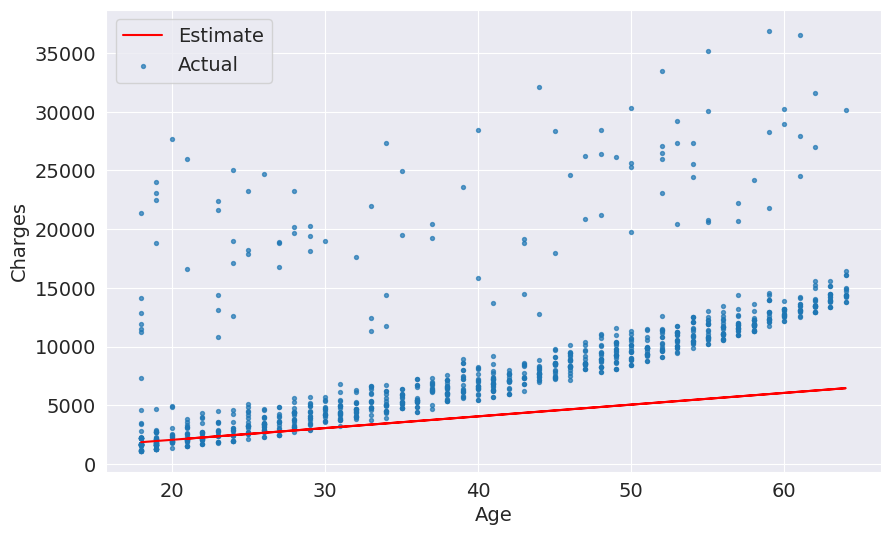

In [48]:
plt.plot(ages, estimated_charges, "r")
plt.scatter(non_smoker_df.age, non_smoker_df.charges, s=8, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(['Estimate','Actual'])

In [49]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

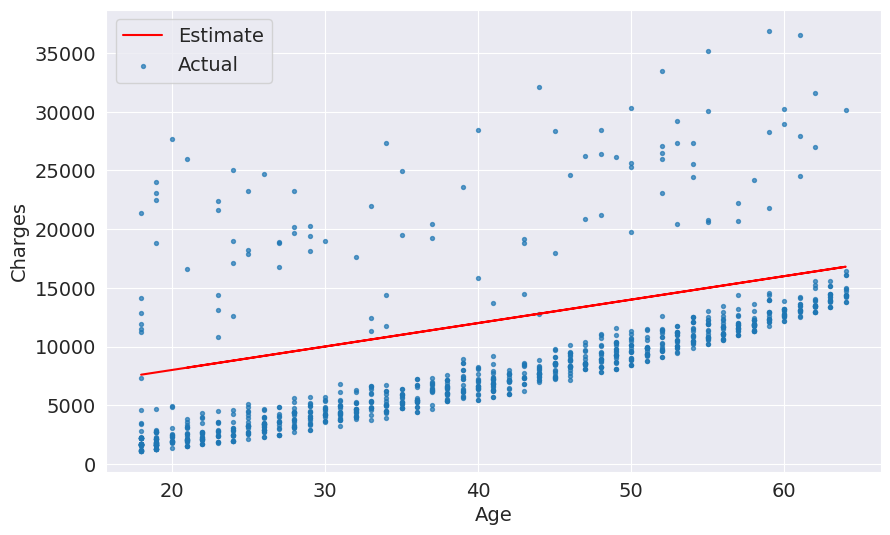

In [60]:
w = 200
b = 4000
def try_parameters(w, b):
    estimated_charges = estimate_charges(non_smoker_df.age,w,b)
    plt.plot(ages, estimated_charges, "r")
    plt.scatter(non_smoker_df.age, non_smoker_df.charges, s=8, alpha=0.7)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(['Estimate','Actual'])

try_parameters(w,b)

In [63]:
predicted = estimate_charges(non_smoker_df.age, w, b)
real = non_smoker_df.age
print(rmse(real, predicted))

12164.616711464529


In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()